# Debates about the refugee crisis in Europe

Student names: Nand Rizvanolli, Stan van der Bij, Sem van Veen, Noah Hamzaoui

Team number: K3

In [23]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import itertools


# Load image from link
url = 'https://carnegie-production-assets.s3.amazonaws.com/static/media/images/GettyImages-494683712_refugee_605-1.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© Carnegie Europe / Stefan Lehne"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© Carnegie Europe / Stefan Lehne


## Introduction

For more than a decade, the refugee crisis has been a significant issue within Europe, especially the European Union. Human rights organizations argue that the EU has a moral obligation to assist individuals escaping war and poverty, emphasizing the need to protect these people. These groups highlight that many refugees are fleeing life-threatening situations and require immediate support and a safe place to live.

Conversely, some European governments and citizens express concerns about the potential negative impacts of accepting  a large number of refugees. These concerns include the general strain on the country’s welfare, and perhaps challenges with cultural integration. The refugee crisis has sparked intense debates, with different perspectives often clashing over how best to address the situation.

This data story will explore the refugee crisis in Europe by analyzing various datasets on migration and more specifically refugees to better understand the realities of the situation. We will examine the actual number of refugees entering European countries, compare this with historical data, and analyze the socioeconomic impacts on host countries. Additionally, we will delve into the narratives surrounding the crisis, assessing whether the situation is as dire as some media and politicians suggest or if the influx of refugees is consistent with past trends.

## Dataset and Preprocessing

### Datasets

This study utilizes multiple datasets sourced from various reputable organizations. Below is an overview of each dataset and the variables they contain:

1. [**<u>RESPOND Dataset - Refugee Protection</u>**](https://zenodo.org/records/4653406)
   - 33 Variables
   - (2017-2020) Responses from interviews conducted with refugees.

2. [**<u>United Narions (UN) World Refugee Data</u>**](https://www.kaggle.com/datasets/avtnshm/united-nations-refugee-data-unhcr)
   - 12 Variables
   - (1953-2023) Yearly data on the number of refugees worldwide as reported by the United Nations.

3. [**<u>World Population Data</u>**](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset)
   - 17 Variables
   - (1960-2022) Yearly population statistics for countries around the world.

4. [**<u>World GDP</u>**](https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths)
   - 64 Variables
   - (1960-2020) Yearly information on the Gross Domestic Product (GDP) for countries around the world.

5. [**<u>Public Acceptance of Refugees</u>**](https://data.mendeley.com/datasets/p7k35cghyb/2)
   - 21 Variables
   - (2017) German refugees their life and reasoning for migration.

6. [**<u>Pending Status Refugees</u>**](https://www.kaggle.com/datasets/unitednations/refugee-data)
   - 14 Variables
   - (2000-2016) Yearly progress of asylum-seekers through the refugee status determination process, with data on UNHCR assistance.


### Preprocessing

The preprocessing of these datasets involved several steps to ensure that the data was suitable for analysis. The key preprocessing steps are outlined below:

1. **Filtering for European Countries:**
   - The analysis focused solely on European countries. Therefore, non-European countries were excluded from the datasets (Turkey is the only country partly in Europe that is included, since it is an interesting and insightful case)

2. **Selecting Relevant Columns:**
   - Not all columns in each dataset were necessary for the analysis. The specific columns selected for each dataset are as follows:
     - **Refugee Interview Dataset:**
       - Country of residence during the interview (VAR01)
       - Rejection, first instance (VAR27)
     - **UN World Refugee Data:**
       - Year
       - Country of origin
       - Country of asylum
       - Refugees under UNCHR's mandate
     - **World Population Data:**
       - Country
       - Population over the years
     - **World GDP:**
       - Country
       - GDP Per Capita (Economic output of a country per inhabitant)
       - GDP PPP Per Capita (Economic output of a country per inhabitant adjusted for purchasing power)
     - **Public Acceptance of Refugees:**
       - Reasoning for moving countries (vig_reason)
     - **Pending Status Refugees:**
       - Year
       - Total pending applications start of the year

3. **Data Cleaning:**
   - Missing values and inconsistencies in the data were addressed. This involved handling null values, correcting data entry errors, and ensuring uniformity in data formats.

4. **Data Integration:**
   - The datasets World Population Data, World GDP & UN World Refugee Data were merged based on country ID and the last overlapping year (2020) for the bubble chart.

By following these preprocessing steps, we ensured that the datasets were clean, consistent, and ready for subsequent analysis.

## Amount of refugees

We aim to analyze the refugee intake per capita in various European countries to understand the magnitude of the refugee crisis and its impact on host nations. By examining the number of refugees per 1000 inhabitants, we can identify trends and disparities in how different countries are coping with the influx of refugees. The data visualizations will help illustrate the extent of the burden and the increasing pressure on public services and infrastructure due to rising refugee numbers.

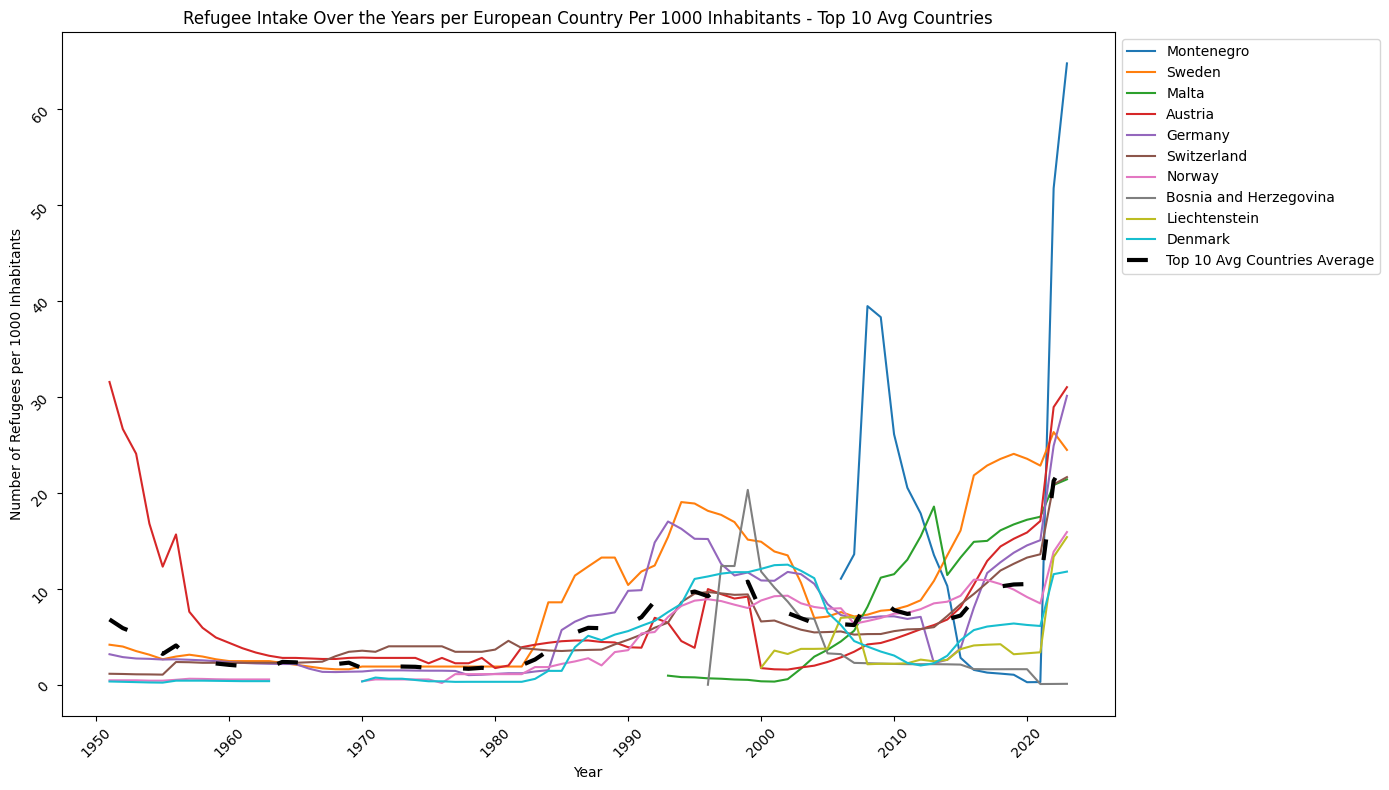

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

line_styles = ['-', '--', '-.', ':']
striped_line = (0, (5, 10))
remaining_colors = itertools.cycle(plt.cm.tab20.colors)

# Load the datasets
population_data = pd.read_csv('DataSets/european_population.csv')
refugee_data = pd.read_csv('DataSets/UN_European_Countries_Refugee_Data.csv')

# Define years to exclude for specific countries
excluded_years = {
    'Croatia': list(range(1991, 2000)),
    'Slovenia': list(range(1991, 1996)),
    'North Macedonia': list(range(1991, 1996)),
    'Montenegro': list(range(1991, 1996)),
    'Bosnia and Herzegovina': list(range(1992, 1996)),
    'Serbia': list(range(1992, 1996))
}

# Filter the refugee data to exclude the specified years for the specified countries
for country, years in excluded_years.items():
    refugee_data = refugee_data[~((refugee_data['Country of asylum'] == country) & (refugee_data['Year'].isin(years)))]

# Use the 2022 population data for all years
population_2022 = population_data[['Country/Territory', '2022 Population']]
population_2022.columns = ['Country of asylum', 'Population']
data_with_population = refugee_data.merge(population_2022, on='Country of asylum', how='left')
data_with_population['Refugees per 1000'] = (data_with_population['Refugees under UNHCR\'s mandate'] / data_with_population['Population']) * 1000
data_grouped_per_capita = data_with_population.groupby(['Year', 'Country of asylum'])['Refugees per 1000'].sum().unstack()
average_line_per_capita = data_grouped_per_capita.mean(axis=1)

average_refugees_per_year_per_capita = data_grouped_per_capita.mean()
top_10_avg_countries_per_capita = average_refugees_per_year_per_capita.sort_values(ascending=False).head(10).index
top_10_avg_colors_per_capita = {country: color for country, color in zip(top_10_avg_countries_per_capita, plt.cm.tab10.colors)}
top_10_avg_countries_data_per_capita = data_grouped_per_capita[top_10_avg_countries_per_capita]
top_10_avg_line_per_capita = top_10_avg_countries_data_per_capita.mean(axis=1)

plt.figure(figsize=(14, 8))
for country in top_10_avg_countries_per_capita:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle='-', color=top_10_avg_colors_per_capita[country])
plt.plot(data_grouped_per_capita.index, top_10_avg_line_per_capita, label='Top 10 Avg Countries Average', linestyle=striped_line, color='black', linewidth=3)
plt.title('Refugee Intake Over the Years per European Country Per 1000 Inhabitants - Top 10 Avg Countries')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 Inhabitants')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

*Figure 2: Refugee intake per European country per 1000 inhabitants top 10 average countries.*

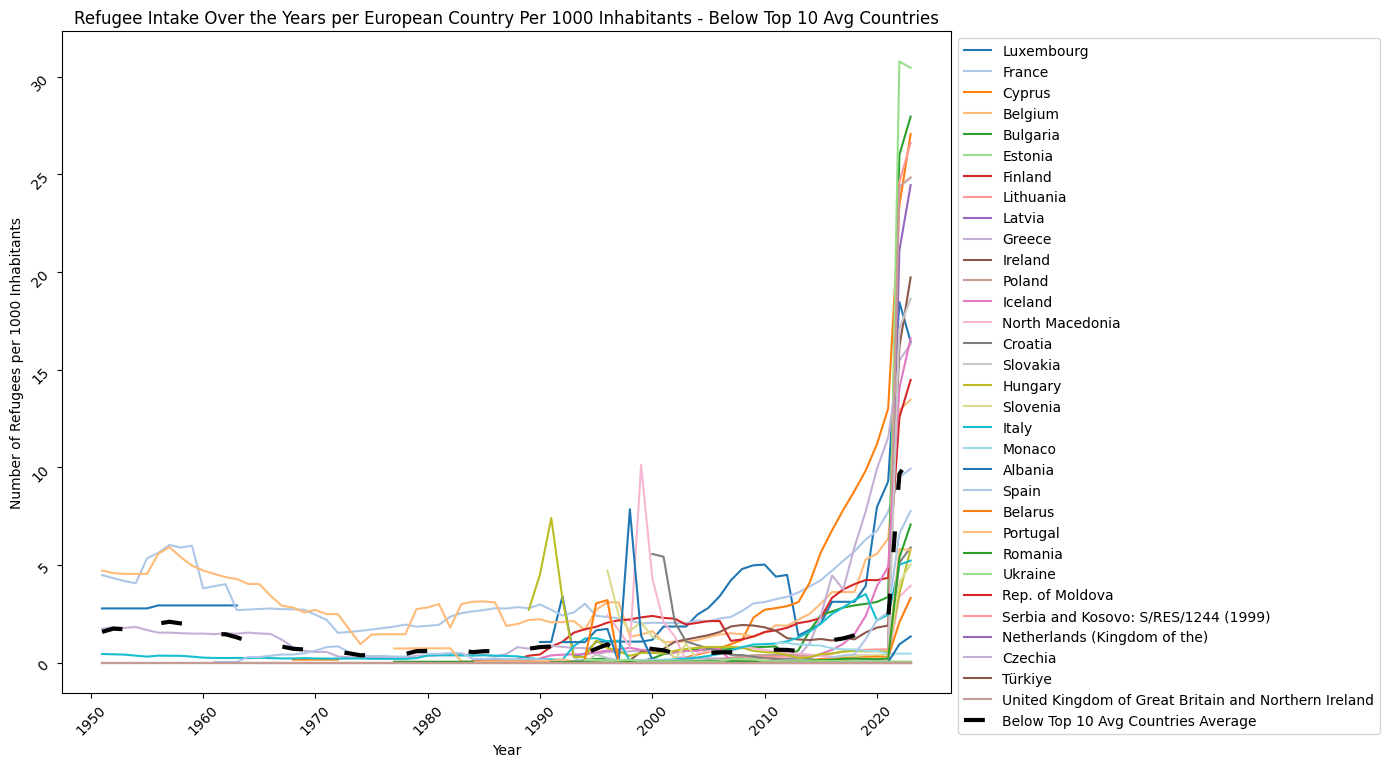

In [14]:
below_top_10_avg_countries_per_capita = average_refugees_per_year_per_capita.sort_values(ascending=False).iloc[10:].index
below_top_10_avg_countries_data_per_capita = data_grouped_per_capita[below_top_10_avg_countries_per_capita]
below_top_10_avg_line_per_capita = below_top_10_avg_countries_data_per_capita.mean(axis=1)

plt.figure(figsize=(14, 8))
for country in below_top_10_avg_countries_per_capita:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle=next(itertools.cycle(line_styles)), color=next(remaining_colors))
plt.plot(data_grouped_per_capita.index, below_top_10_avg_line_per_capita, label='Below Top 10 Avg Countries Average', linestyle=striped_line, color='black', linewidth=3)
plt.title('Refugee Intake Over the Years per European Country Per 1000 Inhabitants - Below Top 10 Avg Countries')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 Inhabitants')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

*Figure 3: Refugee intake per European country per 1000 inhabitants below top 10 average countries.* \
*Top 10 and below top 10 split up for clarity.*

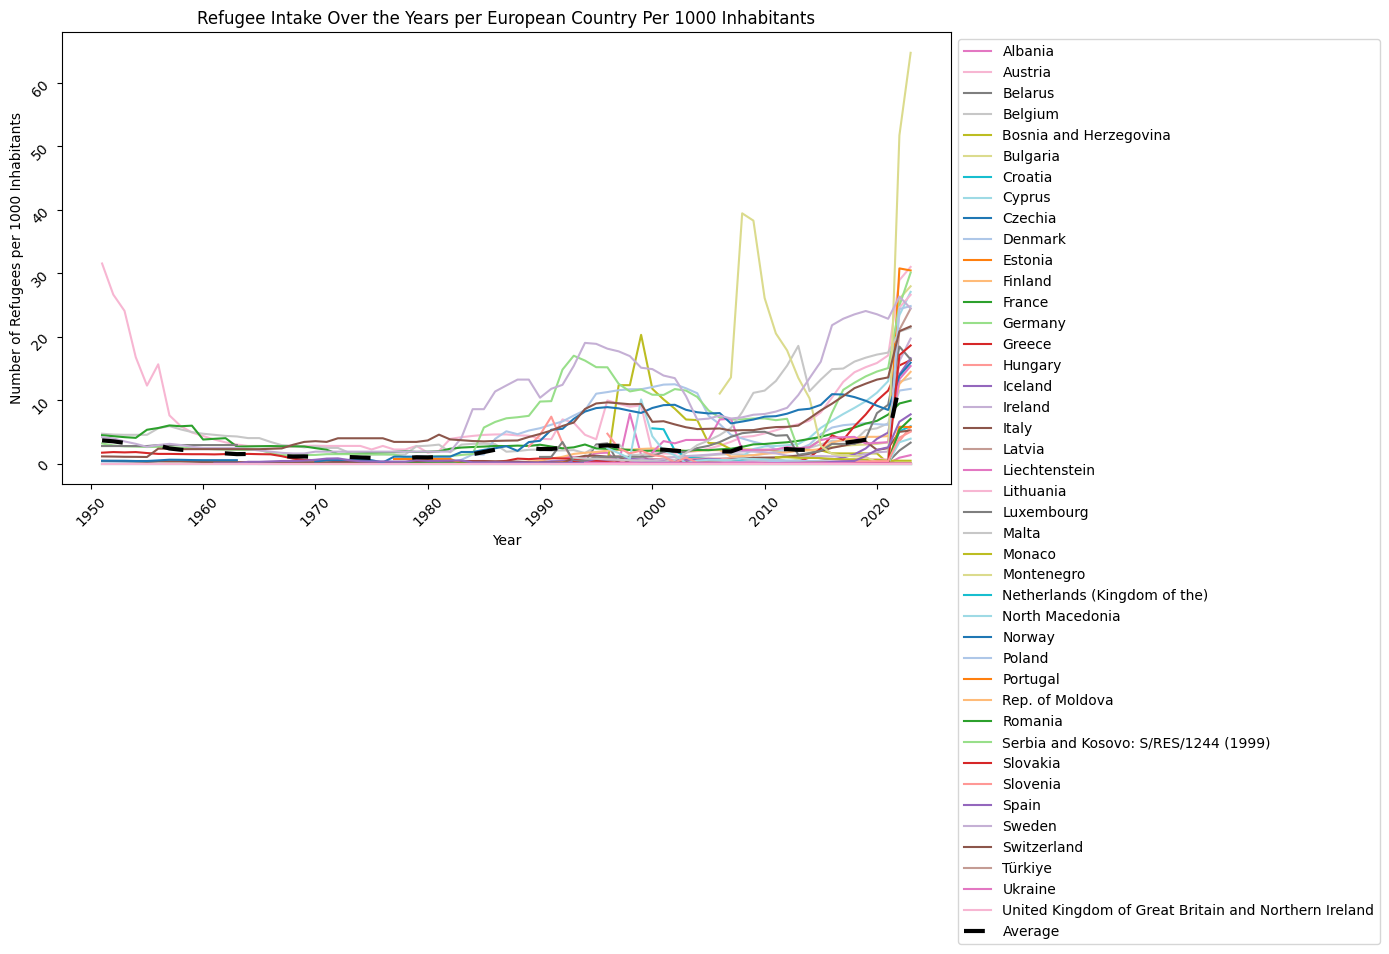

In [15]:
plt.figure(figsize=(14, 8))
for country in data_grouped_per_capita.columns:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle=next(itertools.cycle(line_styles)), color=next(remaining_colors))
plt.plot(data_grouped_per_capita.index, average_line_per_capita, label='Average', linestyle=striped_line, color='black', linewidth=3)
plt.title('Refugee Intake Over the Years per European Country Per 1000 Inhabitants')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 Inhabitants')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

*Figure 4: Refugee intake per European country per 1000 inhabitants.*

The data reveals a consistent rise in the number of refugees per 1000 inhabitants across most European countries, highlighting the growing burden on these nations. The visualizations show that in 9 out of the top 10 countries, refugee numbers rose significantly, indicating substantial pressure on public services and infrastructure. To provide a clearer analysis, we removed the first few years of independence for the Yugoslav countries, as these years had abnormally high peaks due to an abnormal situation. The average line across all countries illustrates a steady increase in refugee numbers, reinforcing the overall trend of rising pressure. Notably, Montenegro stands out as the country with the highest refugee intake per 1000 inhabitants in Europe, primarily due to its ties with Ukraine, leading to a considerable influx of refugees. These trends underscore the urgency of addressing the refugee crisis comprehensively, balancing humanitarian responsibilities with practical concerns about resource allocation and integration challenges. The visualizations clearly indicate that the pressure on public services and infrastructure is escalating, necessitating a coordinated and sustainable response from European nations.

## Distribution over Europe

This map shows the distribution of refugees over Europe from 1951 to 2023. With this, we want to look further into the spread of refugees over Europe and if this is done evenly. In earlier years, there is a lack of data for most Central and Eastern European countries.

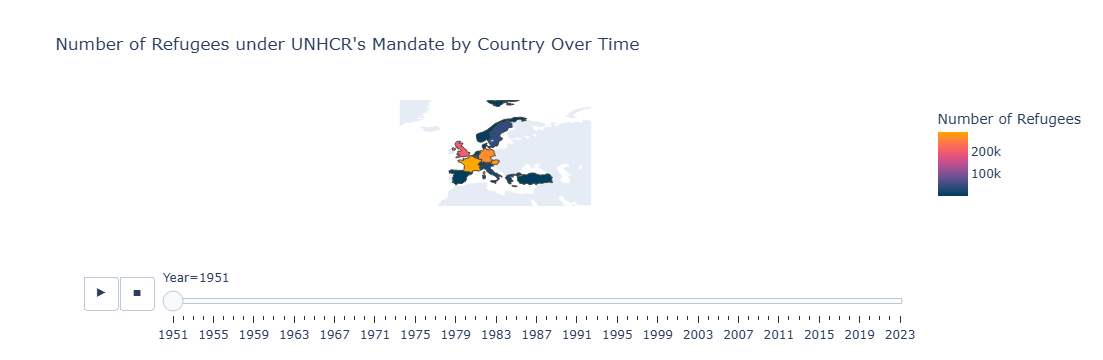

In [16]:
file_path = 'DataSets/UN_European_Countries_Refugee_Data.csv'
df = pd.read_csv(file_path)

agg_df = df.groupby(['Year', 'Country of asylum', 'Country of asylum (ISO)'])['Refugees under UNHCR\'s mandate'].sum().reset_index()

fig = px.choropleth(
    agg_df,
    locations="Country of asylum (ISO)",
    color="Refugees under UNHCR's mandate",
    hover_name="Country of asylum",
    animation_frame="Year",
    color_continuous_scale=["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"],
    title="Number of Refugees under UNHCR's Mandate by Country Over Time",
    labels={'Refugees under UNHCR\'s mandate': 'Number of Refugees'}
)

# Layout update
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        lataxis=dict(range=[25, 80]), 
        lonaxis=dict(range=[-35, 65])
    ),
    coloraxis_colorbar=dict(
        title="Number of Refugees"
    ),
)

fig.show()

> *Figure 5: Choropleth Map: Amount of refugees under UNHCR's mandate by country over time.*

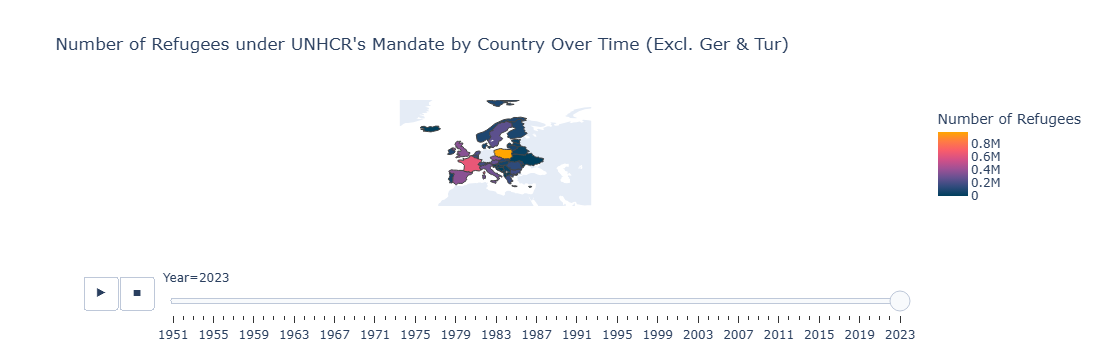

In [17]:
# Exclude Germany and Turkey
df_excl_germany_turkey = df[(df['Country of asylum'] != 'Germany') & (df['Country of asylum'] != 'Türkiye')]

agg_df_excl_germany_turkey = df_excl_germany_turkey.groupby(['Year', 'Country of asylum', 'Country of asylum (ISO)'])['Refugees under UNHCR\'s mandate'].sum().reset_index()

fig_excl_germany_turkey = px.choropleth(
    agg_df_excl_germany_turkey,
    locations="Country of asylum (ISO)",
    color="Refugees under UNHCR's mandate",
    hover_name="Country of asylum",
    animation_frame="Year",
    color_continuous_scale=["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"],
    title="Number of Refugees under UNHCR's Mandate by Country Over Time (Excl. Ger & Tur)",
    labels={'Refugees under UNHCR\'s mandate': 'Number of Refugees'}
)

fig_excl_germany_turkey.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        lataxis=dict(range=[25, 80]), 
        lonaxis=dict(range=[-35, 65])
    ),
    coloraxis_colorbar=dict(
        title="Number of Refugees"
    ),
)

fig_excl_germany_turkey.show()

> *Figure 6: Choropleth Map: Amount of refugees under UNHCR's mandate by country over time, excluding Turkey and Germany.*

As can be seen in both graphs, in recent years, there is a noticeable increase in the number of refugees, especially in the larger countries. Germany and Turkey specifically seems to have a substantial increase in refugees in recent years. Germany seems to have had a substantially larger number of refugees since 1985, likely because it's a large, rich country. From 2012, there is a substantial increase of refugees in Turkey. This is because Turkey provided unlimited duration of stay to Syrians, since a Syrian civil war started in 2011. Turkey is also a transit between Asia and Europe, preventing irregular migration, which results in lots of refugees staying in Turkey (Kaya, A. 2023). These two counties indicate a poor spread of refugees. 

It should also be noted that Serbia and Kosovo had a notable amount of refugees between 1992 and 2005 because of the breakup of Yugoslavia combined with the Kosova war and its after effects. Another notable exception is the Ukranian war, resulting in an increased amount of refugees in Central and Eastern Europe, especially Poland.

When removing Germany and Turkey from the map and noting the exceptional cases above, a substantional amount of refugees are still in Western, Southern and Northern Europe. Although this is the case, when keeping in mind the amount of citizens in a country, the refugees are fairly well spread across these parts in Europe. The Ukranian war also indicates that it's possible for Central and Western Europe to take in and distrubute refugees.

Although the distribution is not perfect, it can be argued that the spread of refugees in recent years is improving compared to earlier years. This could indicate that the refugee crisis is not as bad as some media and politicians make it seem. Still, the distribution is not perfect and could definitely be improved.

## Influence of refugees on a country

### Asylum applications

The graph shows a dramatic increase in asylum applications in Europe from 2013 to 2016, with numbers peaking over 1.2 million in 2016. 

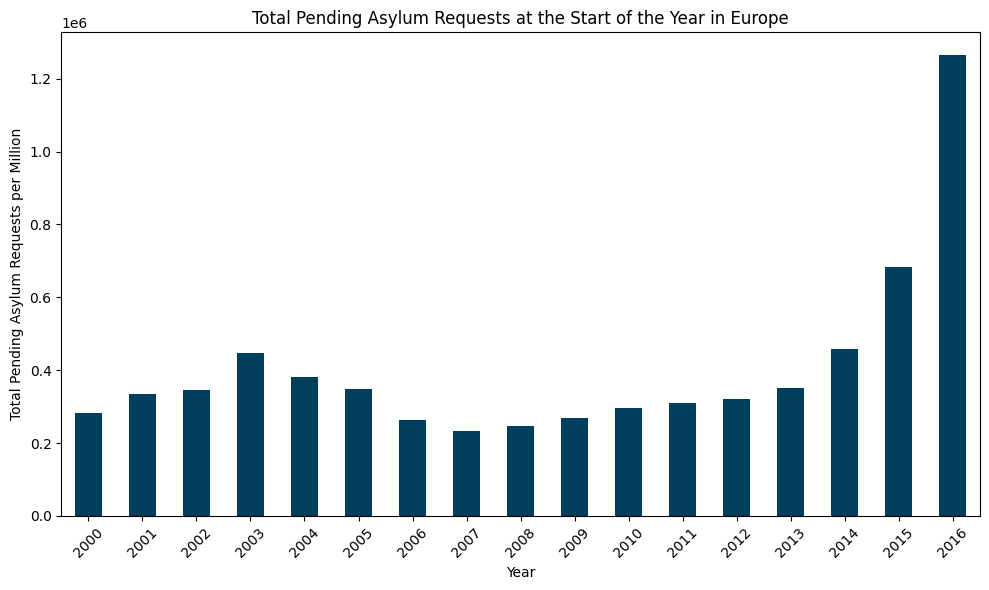

In [18]:
file_path = r'DataSets/preprocessed_asylum_seekers.csv'
data = pd.read_csv(file_path, low_memory=False)


total_pending_start_year_europe = data.groupby('Year')['Tota pending start-year'].sum()

plt.figure(figsize=(10, 6))
total_pending_start_year_europe.plot(kind='bar', color='#003f5c')
plt.title('Total Pending Asylum Requests at the Start of the Year in Europe')
plt.xlabel('Year')
plt.ylabel('Total Pending Asylum Requests per Million')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> *Figure 7: Barplot: Total Pending Asylum Requests at the Start of the Year in Europe.*

The dramatic increase in asylum applications from 2013 to 2016, peaking at over 1.2 million in 2016, indicates that the European asylum system is under significant pressure. This surge creates backlogs, strains resources, and overwhelms infrastructure and services, leading to delays and inadequate conditions for asylum seekers. Additionally, it complicates legal processes, social integration, and political relations, while imposing substantial economic burdens.

The surge in asylum applications creates backlogs, strains resources, and overwhelms infrastructure and services for several reasons:

Administrative Capacity: The system must process a large volume of applications, which slows down decision-making and creates backlogs. <br>
Resource Allocation: More staff, infrastructure, and upgraded systems are needed to handle the increased workload, straining budgets.<br>
Housing and Services: Temporary housing becomes overcrowded, and essential services like healthcare and education are stretched thin, leading to inadequate conditions.<br>
Legal Complexity: Each application requires legal scrutiny, increasing the workload for legal systems and leading to potential errors and delays.<br>
Social Integration: High numbers of asylum seekers overextend programs for integration, making it harder to provide effective language training, job placement, and cultural orientation.<br>
Political Tensions: The increased burden can strain international relations and polarize domestic politics, complicating policy responses.<br>
Economic Impact: The financial costs of processing applications and providing services impose substantial economic burdens on national and local budgets.<br>


### Rejection in different countries

In this dataset we show the chance of rejection for refugees in different countries based on interviews held between 2017 and 2020. The amount of rejections could tell us if countries are dealing with a too large amount of refugees.

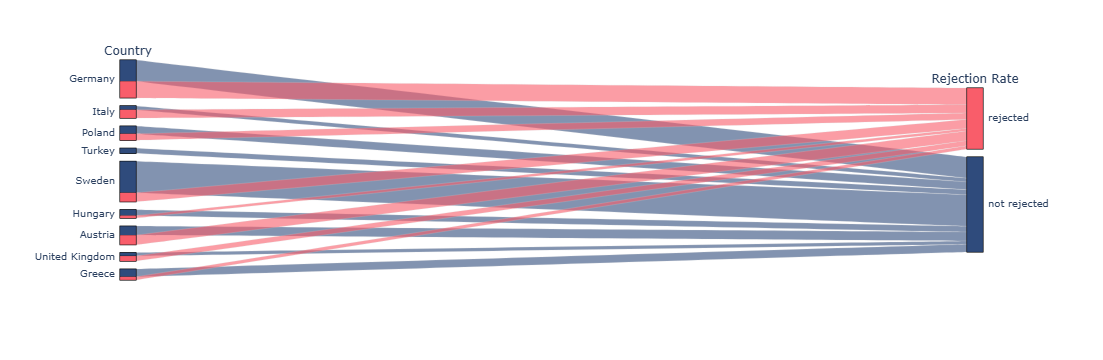

In [19]:
file_path = 'DataSets/refugee_interview_filtered.csv'
population_data = pd.read_csv(file_path)

data = population_data[['VAR01', 'VAR27']].copy()
data.columns = ['Country', 'Rejection_Rate']

color_mapping = {'not rejected': 0, 'rejected': 1}
data['Rejection_Rate_Num'] = data['Rejection_Rate'].map(color_mapping)

color_scale = [(0, '#2f4b7c'), (1, '#f95d6a')]

fig = px.parallel_categories(data, dimensions=['Country', 'Rejection_Rate'],
                             labels={'Country': 'Country', 'Rejection_Rate': 'Rejection Rate'},
                             color='Rejection_Rate_Num',
                             color_continuous_scale=color_scale)

fig.update_layout(coloraxis_showscale=False)
fig.show()

> *Figure 8: Parallel Categories Diagram: Number of asylum requests denied and accepted per country* \

This chart shows that when applying for asylum, a majority of the refugees get accepted. Even though this is the case, a noticable amount of refugees also get rejected. Most countries have around as many people rejected as not, with Sweden and Turkey as exceptions, as they don't reject as many refugees. It is important to realise that since there is not much data, small differences may not indicate that much. For example, Italy rejects more in this graph than they accept, but since only 19 refugees from Italy were interviewed, this difference isn't large enough to draw a valid conclusion.

A large rejection rate indicates that there isn't enough place for the refugees or that these refugees aren't wanted in the country. Both of these indicate a refugee crisis. Since most countries in this graph reject a fairly large amount of refugees, it is suggested that there is a refugee crisis in Europe.

Although this is the case, it can also be stated that the rejection rate is not significant enough to conclude a refugee crisis. A large rejection rate in some countries and a low rejection rate in other countries can also indicate a good spread of refugees across Europe, which is a valid way of avoiding a refugee crisis.

### Influence on the economy

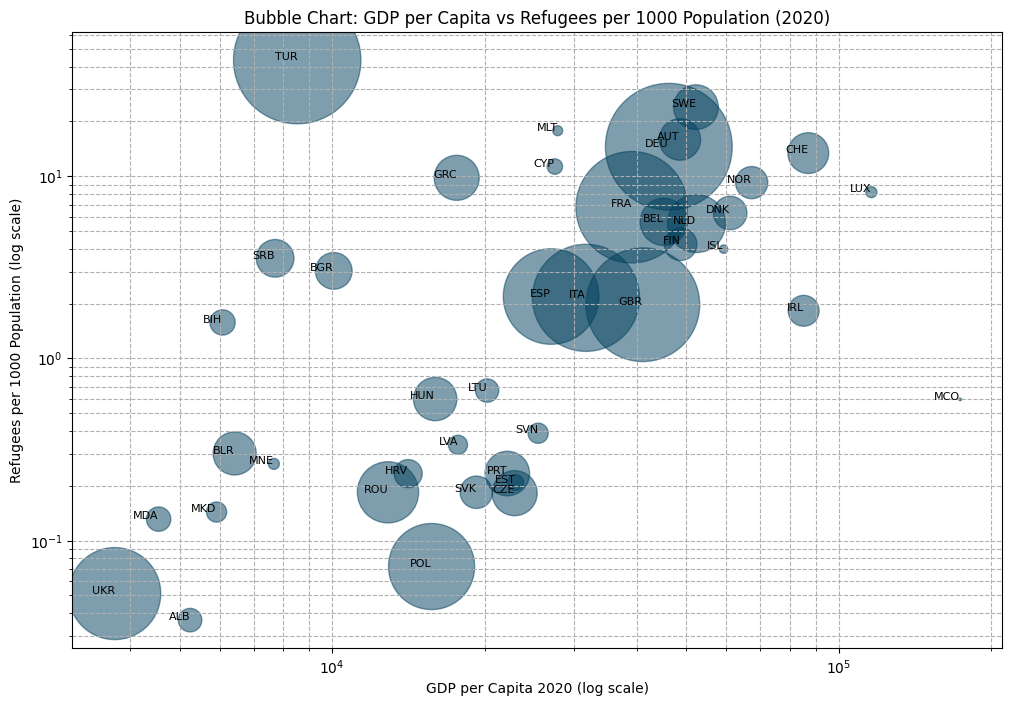

In [20]:
file_path = 'DataSets/gdp_pop_ref_2020.csv'
data = pd.read_csv(file_path)

 # Remove non-finite values
data_cleaned = data.dropna(subset=['GDP per Capita 2020']).reset_index(drop=True)

# Calculate refugees per 1,000 population
data_cleaned['Refugees per 1000 Population'] = data_cleaned['Refugees 2020'] / (data_cleaned['Population 2020'] / 1000)

# Bubble chart with GDP per Capita (log scale) and Refugees per 1,000 Population (log scale)
plt.figure(figsize=(12, 8))
bubble_size = data_cleaned['Population 2020'] / 10000

plt.scatter(data_cleaned['GDP per Capita 2020'], data_cleaned['Refugees per 1000 Population'], 
            s=bubble_size, alpha=0.5, c='#003f5c')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP per Capita 2020 (log scale)')
plt.ylabel('Refugees per 1000 Population (log scale)')
plt.title('Bubble Chart: GDP per Capita vs Refugees per 1000 Population (2020)')
plt.grid(True, which="both", ls="--")

# Annotate each bubble with the country name
for i in range(data_cleaned.shape[0]):
    plt.text(data_cleaned['GDP per Capita 2020'][i], data_cleaned['Refugees per 1000 Population'][i], 
             data_cleaned['ISO_Code'][i], fontsize=8, ha='right')

plt.show()

> *Figure 9: Bubble Chart: Gross Domestic Product (GDP) Per Capita compared to refugees per 1000 of the population in 2020 at log scale* \
> *The size of the bubble indicates the population of the country.*

The Pearson correlation between GDP per capita and refugees per inhabitant in the provided dataset is approximately 0.115. This indicates a very weak positive correlation, suggesting that as GDP per capita increases, the number of refugees per inhabitant also tends to increase slightly.

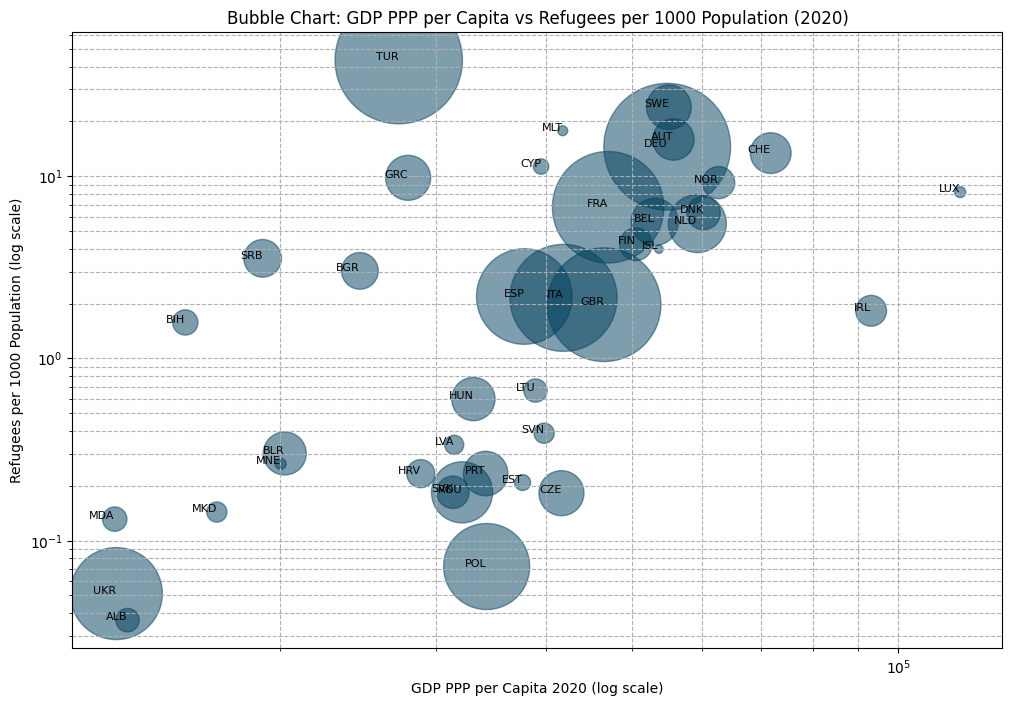

In [21]:
file_path = 'DataSets/GDP_PPP_Per_Capita_Europe.csv'
data = pd.read_csv(file_path)

# Remove non-finite values in relevant columns
data_cleaned = data.dropna(subset=['GDP PPP per Capita 2020', 'Population 2020', 'Refugees 2020']).reset_index(drop=True)

# Calculate refugees per 1,000 population
data_cleaned['Refugees per 1000 Population'] = data_cleaned['Refugees 2020'] / (data_cleaned['Population 2020'] / 1000)

# Bubble chart with GDP per Capita (log scale) and Refugees per 1,000 Population (log scale)
plt.figure(figsize=(12, 8))
bubble_size = data_cleaned['Population 2020'] / 10000

plt.scatter(data_cleaned['GDP PPP per Capita 2020'], data_cleaned['Refugees per 1000 Population'], 
            s=bubble_size, alpha=0.5, c='#003f5c')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP PPP per Capita 2020 (log scale)')
plt.ylabel('Refugees per 1000 Population (log scale)')
plt.title('Bubble Chart: GDP PPP per Capita vs Refugees per 1000 Population (2020)')
plt.grid(True, which="both", ls="--")

# Annotate each bubble with the country name
for i in range(data_cleaned.shape[0]):
    plt.text(data_cleaned['GDP PPP per Capita 2020'][i], data_cleaned['Refugees per 1000 Population'][i], 
             data_cleaned['ISO_Code'][i], fontsize=8, ha='right')

plt.show()

> *Figure 10: Bubble Chart: Gross Domestic Product (GDP) at Purchasing Power Parity (PPP) Per Capita compared to refugees per 1000 of the population in 2020 at log scale* \
> *The size of the bubble indicates the population of the country.*

The Pearson correlation between GDP PPP per capita and refugees per inhabitant in the provided dataset is approximately 0.228. This indicates a weak positive correlation, suggesting that as GDP PPP per capita increases, the number of refugees per inhabitant also tends to increase slightly

First of all, these charts show that wealthier European countries, like Germany, Sweden, and Austria, have more refugees per 1000 people. This suggests that refugees are targeting these countries for their better living conditions and job opportunities, indicating that many might be economic migrants rather than escaping war or political persecution.

The data also shows that many European countries with higher GDP per capita have more refugees compared to poorer nations. If most refugees were fleeing political or war-related issues, we would expect a more even spread across various countries, including those with lower GDP per capita. The concentration in wealthier countries suggests economic motives.

And even though the graphs focus on 2020, the trend of rising refugee numbers in wealthy European countries suggests the crisis is getting worse. The large bubbles for these countries indicate that the influx of refugees is not temporary but growing. This can strain public services and social systems, making the crisis harder to manage.

Last of all the significant number of refugees in countries like Germany and Sweden, known for their strong economies and generous asylum policies, supports the idea that many are seeking better economic opportunities. The clustering in these affluent countries indicates that many migrants are economic migrants.

In conclusion the graphs show that the refugee crisis in Europe is worsening and that many refugees are economic migrants. This trend puts increasing pressure on wealthier European countries, suggesting a need for comprehensive policy solutions to address the crisis.

## Reasoning for migration

This pie chart reveals the varied reasons behind migration in Germany, offering some insight into the current refugee crisis in Europe. 

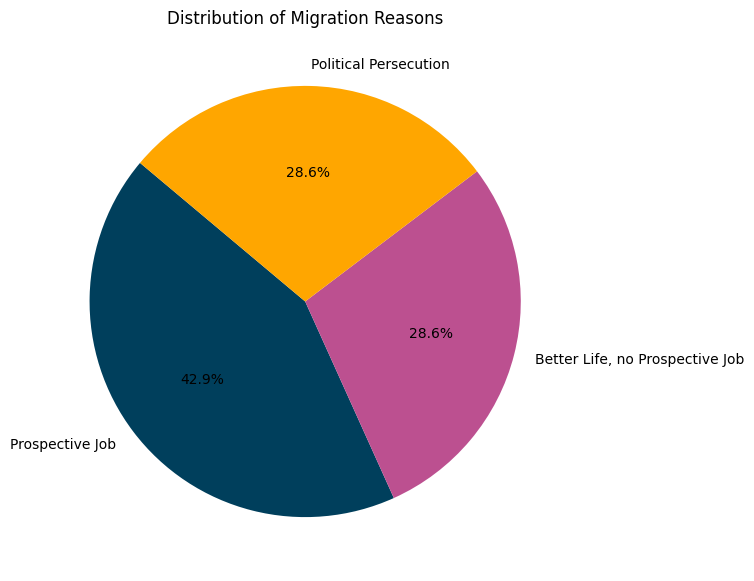

In [22]:
file_path = 'DataSets/Duitsland_Tabel.csv'
data = pd.read_csv(file_path, delimiter=';')
vig_reason_counts = data['vig_reason'].value_counts()
colors = ["#003f5c", "#bc5090", "#ffa600"]

plt.figure(figsize=(10, 7))
plt.pie(vig_reason_counts, labels=vig_reason_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Migration Reasons')
plt.show()

> *Figure 11: Pie Chart: Reasons for migration* 

Contrary to the belief that most migrants are refugees fleeing political persecution or war, the data suggests a different narrative. The largest segment, 42.9%, comprises individuals migrating in search of prospective jobs. This significant proportion indicates that many of the newcomers are economic migrants, rather than traditional refugees.

Additionally, while 28.6% of migrants cite political persecution as their reason for leaving, an equal percentage is moving for a better life without specific job prospects. These individuals are not necessarily escaping immediate danger or persecution but are seeking improved living conditions, healthcare, and education.

This trend highlights the increasing pressure on Europe's resources and infrastructure, as a substantial number of migrants are driven by economic motivations rather than dire necessity.

However, over 70% of the migrants aren't refugees, showing that the refugee crisis in at least Germany is not as severe as some media and politicians portray.

## Reflection

### Peer feedback
On June 20th, 2024, our team K3, went to get our site reviewed by another group, K2, and a TA. After we had presented our visualizations, we got feedback on what could be improved, and things we had already done well.

Most of the feedback we received for the version we had at time was that our arguments were clearly represented by the types of graphs we used, making the arguments we gave during the presentation solid and logical.

Below is a list of the feedback provided from group K2 and the TA:
    - Represent both arguments more evenly (and clearer) by interpreting the data differently
    - Try to simplify conclusions if possible
    - Remove data from Yugoslavia for figure 2-4 so the data doesn't get skewed by a rare event
    - Clarify on missing data points, and clarify what the data visualizations mean
    - Add drop down menu and change figure 8 if possible

We decided to apply all the given feedback shortly after this, except for the drop down menu and figure 8. 
This was a decision we made due too a personal aesthetic preference for the drop down menu, and for figure 8 we could not see a clearly better way to visualize the data for the argument we wanted to make.


### Self evaluation
If we had more time for this project, we would like to look more at how different variables can influence our data, making our observations found in the data stronger. We would also like to look at the impact of a war ending on the migration/refugee rates, which we briefly discussed during the peer feedback aswell. Another aspect to review would be the countries of origin for the refugees and migrants, combined with more data on the reasons for migration, to get a better understanding of how a refugee crisis could start.

## Work Distribution

During this project, due to difference on locations, we communicated mostly online through group calls or chats. During our first meet, we came up with a subject, two different perspectives and six forms of visualization to support one of these perspectives. Each of the four co-operators of this project made our own visualization of a part of the data. We then also split up into groups of two to make another one. 

### Nand

Wrote Datasets and Preprocessing with Sem. Preprocessed the United Nations Refugee Dataset and worked on figures 2-4 alone and 9 and 10 with Sem, and presented the project during the peer review with Stan and Sem.

### Stan

Wrote the introduction with Noah, worked on figure 8 alone and 5 and 6 with Noah. For figure 8 he also preprocessed the Respond dataset. He also presented the project during the peer review with Nand and Sem, and took notes on the feedback given.

### Sem

Wrote Datasets and Preprocessing with Nand, worked on figure 7 alone and 9 and 10 with Nand. For figure 7 he preprocessed the Pending Status dataset. He also presented the project during the peer review with Nand and Stan.

### Noah

Wrote the introduction with Stan, worked on figure 11 alone and 5 and 6 with Stan. Wrote the Reflection and mostly decided the visualization. He also did the majority work for the visual design of the website.

## References

1. Kaya, A. (2023, November 1). The World’s Leading Refugee Host, Turkey Has a Complex Migration History [Review of The World’s Leading Refugee Host, Turkey Has a Complex Migration History]. Migration Policy Institute. https://www.migrationpolicy.org/article/turkey-migration-history